# Check reoncstruction of best models for each chromosome in detail

In [11]:
import os
import pandas as pd
import numpy as np
import pickle 
import torch
from scripts.visualisation import plot_cpg_reconstruction, plot_activations_latSpace, plot_all_cpgs_reconstruction
from scripts.train_RFregressor import RFregression
from data.prepareData import prepareDataLoader_fromPkl
import matplotlib.pyplot as plt
import seaborn as sns
import json 

from tensorflow.python.summary.summary_iterator import summary_iterator

# Load Data

In [103]:
PATH_data = "/data/scratch/skatz/PROJECTS/methylnet/1_healthyVAE/data/GSE87571/train_val_test_sets/"
CHR = "chr7"

### Load data
with open(os.path.join(PATH_data, f"{CHR}_train_methyl_array.pkl"), "rb") as f: train_dataset = pickle.load(f) #
train_tensor = prepareDataLoader_fromPkl(f"{PATH_data}/{CHR}_train_methyl_array.pkl", colName="Age").returnTensor_()

with open(os.path.join(PATH_data, f"{CHR}_test_methyl_array.pkl"), "rb") as f: test_dataset = pickle.load(f) #
test_tensor = torch.tensor(test_dataset["beta"].values, dtype=torch.float32)

# Reoncstruction random CpGs

latSize_70_lr_0.0001_dropr_0.1


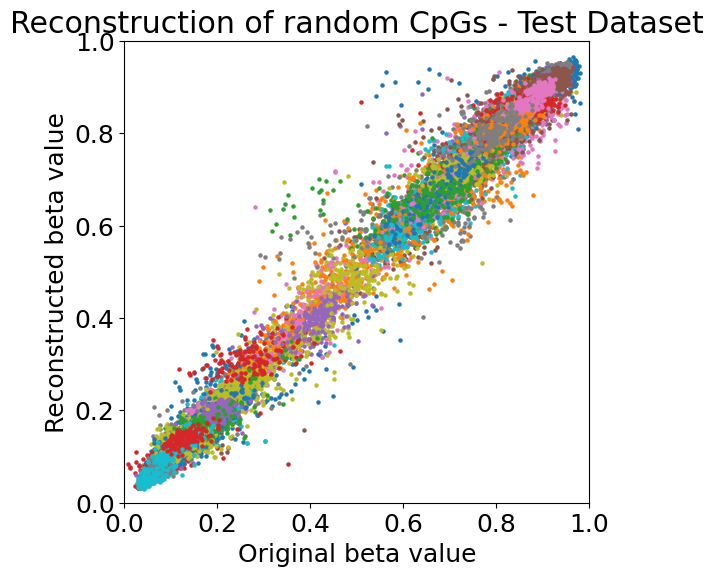

In [104]:
PATH_results = f"logs/optimisation/{CHR}/coarse"

with open(f"{PATH_results}/best_model_coarseOptimization.json", "r") as f: dict_bestModel = json.load(f)
latSize = dict_bestModel["latSize"]
lr = dict_bestModel["lr"]
dropr = dict_bestModel["dropr"]    
name = f"latSize_{latSize}_lr_{lr}_dropr_{dropr}"
print(name)

path = f"{PATH_results}/{name}"
model = torch.load(f"{path}/checkpoint/trainedModel.pth", map_location=torch.device('cpu'))

plot_cpg_reconstruction(model, test_tensor, size=150)


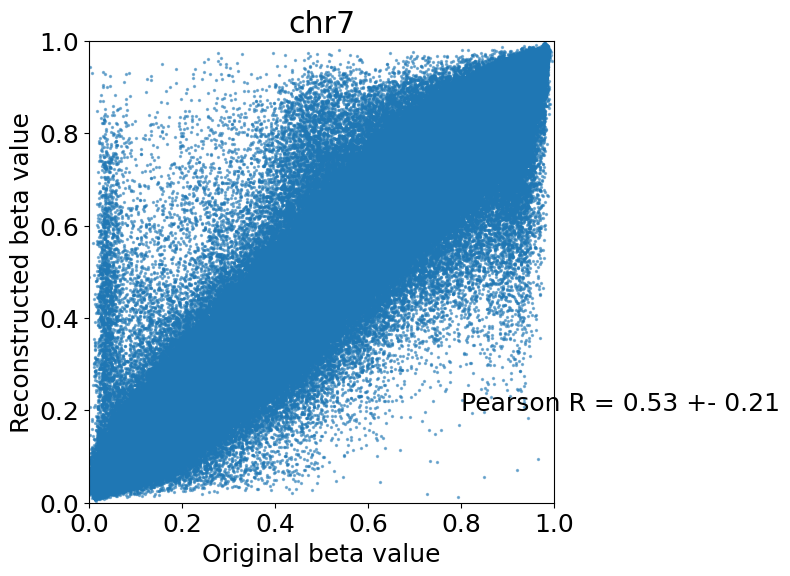

In [105]:
orig, recon = plot_all_cpgs_reconstruction(model, test_tensor, title=f"{CHR}")